In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('H2HBABBA1444.csv')

# Data Preprocessing - Milestone 1

In [3]:
df.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140104225,SAVE-ON- foundation,2019-05-17 00:00:00,2019.0,2.960546e+09,2019-05-06,20190506,20190506,20190516.0,CAD,RV,1.0,NaN,95006.44,20190506.0,CA10,2.960546e+09,0
1,U001,200769623,WAL-MAR corporation,2019-04-15 00:00:00,2019.0,1.929069e+09,2019-04-04,20190402,20190404,20190419.0,USD,RV,1.0,NaN,3785.40,20190404.0,NAH4,1.929069e+09,0
2,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930752e+09,2020-04-06,20200406,20200406,20200421.0,USD,RV,1.0,NaN,2900.46,20200406.0,NAH4,1.930752e+09,1
3,U001,0200705089,JETR co,2019-02-27 00:00:00,2019.0,1.928784e+09,2019-02-12,20190212,20190212,20190227.0,USD,RV,1.0,NaN,22376.73,20190212.0,NAA8,1.928784e+09,0
4,U001,0200769623,WAL-MAR trust,2019-03-06 00:00:00,2019.0,1.928855e+09,2019-02-24,20190225,20190224,20190311.0,USD,RV,1.0,NaN,38123.82,20190224.0,NAH4,1.928855e+09,0
5,CA02,0140104249,SOB,2019-10-02 00:00:00,2019.0,2.960579e+09,2019-09-10,20190910,20190910,20190927.0,CAD,RV,1.0,NaN,5611.03,20190917.0,CA10,2.960579e+09,0
6,U001,0200966944,TONY trust,2020-02-12 00:00:00,2020.0,1.930348e+09,2020-01-10,20200103,20200110,20200211.0,USD,RV,1.0,NaN,13299.40,20200110.0,NA32,1.930348e+09,0
7,U001,0200230690,DECA associates,NaN,2020.0,1.930807e+09,2020-04-21,20200421,20200421,20200408.0,USD,RV,1.0,NaN,4097.60,20200316.0,NAM4,1.930807e+09,1
8,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930799e+09,2020-04-19,20200417,20200419,20200504.0,USD,RV,1.0,NaN,5615.57,20200419.0,NAH4,1.930799e+09,1
9,U001,0200769623,WAL-MAR co,2019-12-31 00:00:00,2019.0,1.930273e+09,2019-12-13,20191212,20191213,20191228.0,USD,RV,1.0,NaN,1829.03,20191213.0,NAH4,1.930273e+09,0


## Null imputation

In [4]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [5]:
df.drop(['area_business'],axis = 1,inplace =True)

In [6]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

## Formatting the date_time values of specific columns

In [7]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [8]:
df[['clear_date' , 'due_in_date' , 'document_create_date' , 'document_create_date.1' , 'baseline_create_date']]

,clear_date,due_in_date,document_create_date,document_create_date.1,baseline_create_date
0,2019-05-17 00:00:00,20190516.0,20190506,20190506,20190506.0
1,2019-04-15 00:00:00,20190419.0,20190402,20190404,20190404.0
2,NaN,20200421.0,20200406,20200406,20200406.0
3,2019-02-27 00:00:00,20190227.0,20190212,20190212,20190212.0
4,2019-03-06 00:00:00,20190311.0,20190225,20190224,20190224.0
...,...,...,...,...,...
49995,2019-12-24 00:00:00,20191227.0,20191212,20191212,20191212.0
49996,NaN,20200512.0,20200430,20200430,20200502.0
49997,2019-10-15 00:00:00,20191019.0,20191003,20191004,20191004.0
49998,2019-06-04 00:00:00,20190601.0,20190517,20190517,20190517.0


### for 'clear_date'

In [9]:
df['clear_date'] = pd.to_datetime(df.clear_date)
df[['clear_date']]

,clear_date
0,2019-05-17
1,2019-04-15
2,NaT
3,2019-02-27
4,2019-03-06
...,...
49995,2019-12-24
49996,NaT
49997,2019-10-15
49998,2019-06-04


### 'for due_in_date'

In [10]:
df['due_in_date'] = df.due_in_date.astype(int)

In [11]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date                      object
document_create_date               int64
document_create_date.1             int64
due_in_date                        int32
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date             float64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [12]:
df['due_in_date'] = df.due_in_date.astype(str)
df['due_in_date'] =  pd.to_datetime(df['due_in_date'], format = '%Y%m%d')
df[['clear_date','due_in_date']]

,clear_date,due_in_date
0,2019-05-17,2019-05-16
1,2019-04-15,2019-04-19
2,NaT,2020-04-21
3,2019-02-27,2019-02-27
4,2019-03-06,2019-03-11
...,...,...
49995,2019-12-24,2019-12-27
49996,NaT,2020-05-12
49997,2019-10-15,2019-10-19
49998,2019-06-04,2019-06-01


### for other columns

In [13]:
df['posting_date'] =  pd.to_datetime(df['posting_date'])

In [14]:
df['document_create_date'] = df.document_create_date.astype(str)
df['document_create_date'] =  pd.to_datetime(df['document_create_date'], format = '%Y%m%d')
df[['clear_date','due_in_date' , 'document_create_date']]

,clear_date,due_in_date,document_create_date
0,2019-05-17,2019-05-16,2019-05-06
1,2019-04-15,2019-04-19,2019-04-02
2,NaT,2020-04-21,2020-04-06
3,2019-02-27,2019-02-27,2019-02-12
4,2019-03-06,2019-03-11,2019-02-25
...,...,...,...
49995,2019-12-24,2019-12-27,2019-12-12
49996,NaT,2020-05-12,2020-04-30
49997,2019-10-15,2019-10-19,2019-10-03
49998,2019-06-04,2019-06-01,2019-05-17


In [15]:
df['baseline_create_date'] = df.baseline_create_date.astype(int)
df['baseline_create_date'] = df.baseline_create_date.astype(str)
df['baseline_create_date'] =  pd.to_datetime(df['baseline_create_date'], format = '%Y%m%d')
df[['clear_date' , 'due_in_date' , 'document_create_date' , 'baseline_create_date']]

,clear_date,due_in_date,document_create_date,baseline_create_date
0,2019-05-17,2019-05-16,2019-05-06,2019-05-06
1,2019-04-15,2019-04-19,2019-04-02,2019-04-04
2,NaT,2020-04-21,2020-04-06,2020-04-06
3,2019-02-27,2019-02-27,2019-02-12,2019-02-12
4,2019-03-06,2019-03-11,2019-02-25,2019-02-24
...,...,...,...,...
49995,2019-12-24,2019-12-27,2019-12-12,2019-12-12
49996,NaT,2020-05-12,2020-04-30,2020-05-02
49997,2019-10-15,2019-10-19,2019-10-03,2019-10-04
49998,2019-06-04,2019-06-01,2019-05-17,2019-05-17


In [16]:
df.rename(columns={'document_create_date.1' : 'document_create_date_1'}, inplace  = True)
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date_1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [17]:

df['document_create_date_1'] = df.document_create_date_1.astype(str)
df['document_create_date_1'] =  pd.to_datetime(df['document_create_date_1'], format = '%Y%m%d')
df[['clear_date' , 'due_in_date' , 'document_create_date' , 'document_create_date_1' , 'baseline_create_date']]

,clear_date,due_in_date,document_create_date,document_create_date_1,baseline_create_date
0,2019-05-17,2019-05-16,2019-05-06,2019-05-06,2019-05-06
1,2019-04-15,2019-04-19,2019-04-02,2019-04-04,2019-04-04
2,NaT,2020-04-21,2020-04-06,2020-04-06,2020-04-06
3,2019-02-27,2019-02-27,2019-02-12,2019-02-12,2019-02-12
4,2019-03-06,2019-03-11,2019-02-25,2019-02-24,2019-02-24
...,...,...,...,...,...
49995,2019-12-24,2019-12-27,2019-12-12,2019-12-12,2019-12-12
49996,NaT,2020-05-12,2020-04-30,2020-04-30,2020-05-02
49997,2019-10-15,2019-10-19,2019-10-03,2019-10-04,2019-10-04
49998,2019-06-04,2019-06-01,2019-05-17,2019-05-17,2019-05-17


In [18]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date_1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

### dropping unnecessary columns

In [19]:
df.drop(['name_customer','cust_payment_terms', 'document type','document_create_date_1','invoice_id'], axis = 1, inplace = True)

In [20]:
df.dtypes

business_code                   object
cust_number                     object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
posting_id                     float64
total_open_amount              float64
baseline_create_date    datetime64[ns]
isOpen                           int64
dtype: object

In [21]:
df.shape

(50000, 13)

### Removing the duplicate features

In [22]:
 df.nunique()

business_code               6
cust_number              1421
clear_date                394
buisness_year               2
doc_id                  48860
posting_date              504
document_create_date      507
due_in_date               552
invoice_currency            2
posting_id                  1
total_open_amount       44190
baseline_create_date      505
isOpen                      2
dtype: int64

In [23]:
def remove_constant(df):
    return[e for e in df.columns if df[e].nunique() == 1]

In [24]:
drop_col = remove_constant(df)
print(drop_col)

['posting_id']


In [25]:
df.drop(['posting_id'],axis = 1,inplace = True)
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen
0,CA02,0140104225,2019-05-17,2019.0,2.960546e+09,2019-05-06,2019-05-06,2019-05-16,CAD,95006.44,2019-05-06,0
1,U001,200769623,2019-04-15,2019.0,1.929069e+09,2019-04-04,2019-04-02,2019-04-19,USD,3785.40,2019-04-04,0
2,U001,0200769623,NaT,2020.0,1.930752e+09,2020-04-06,2020-04-06,2020-04-21,USD,2900.46,2020-04-06,1
3,U001,0200705089,2019-02-27,2019.0,1.928784e+09,2019-02-12,2019-02-12,2019-02-27,USD,22376.73,2019-02-12,0
4,U001,0200769623,2019-03-06,2019.0,1.928855e+09,2019-02-24,2019-02-25,2019-03-11,USD,38123.82,2019-02-24,0


In [26]:
df.shape

(50000, 12)

In [27]:
df.head(10)

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen
0,CA02,0140104225,2019-05-17,2019.0,2.960546e+09,2019-05-06,2019-05-06,2019-05-16,CAD,95006.44,2019-05-06,0
1,U001,200769623,2019-04-15,2019.0,1.929069e+09,2019-04-04,2019-04-02,2019-04-19,USD,3785.40,2019-04-04,0
2,U001,0200769623,NaT,2020.0,1.930752e+09,2020-04-06,2020-04-06,2020-04-21,USD,2900.46,2020-04-06,1
3,U001,0200705089,2019-02-27,2019.0,1.928784e+09,2019-02-12,2019-02-12,2019-02-27,USD,22376.73,2019-02-12,0
4,U001,0200769623,2019-03-06,2019.0,1.928855e+09,2019-02-24,2019-02-25,2019-03-11,USD,38123.82,2019-02-24,0
5,CA02,0140104249,2019-10-02,2019.0,2.960579e+09,2019-09-10,2019-09-10,2019-09-27,CAD,5611.03,2019-09-17,0
6,U001,0200966944,2020-02-12,2020.0,1.930348e+09,2020-01-10,2020-01-03,2020-02-11,USD,13299.40,2020-01-10,0
7,U001,0200230690,NaT,2020.0,1.930807e+09,2020-04-21,2020-04-21,2020-04-08,USD,4097.60,2020-03-16,1
8,U001,0200769623,NaT,2020.0,1.930799e+09,2020-04-19,2020-04-17,2020-05-04,USD,5615.57,2020-04-19,1
9,U001,0200769623,2019-12-31,2019.0,1.930273e+09,2019-12-13,2019-12-12,2019-12-28,USD,1829.03,2019-12-13,0


# EDA and Feature Engineering - Milestone 2

In [28]:
df.sort_values(['posting_date'],inplace = True)

In [29]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen
27022,U001,0200769623,2019-01-11,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,10357.32,2018-12-30,0
31937,U001,0200786288,2019-01-11,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,9388.77,2018-12-30,0
47054,U001,0200762301,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,338.04,2018-12-30,0
26143,U001,0200769623,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,1260.47,2018-12-30,0
6124,U001,0200726979,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,227.60,2018-12-30,0


## Splitting the data into train_test set 

In [30]:
##dividing the null values in the test set nd the no null values in the train set
main_train = df[df['clear_date'].notnull()].copy();
main_test = df[df['clear_date'].isna()].copy();
main_train.shape,main_test.shape

((40000, 12), (10000, 12))

In [31]:
main_train['delay'] = main_train['clear_date'] -main_train['due_in_date']

In [32]:
main_train['delay']

27022   -3 days
31937   -3 days
47054    1 days
26143   -5 days
6124     1 days
          ...  
8825     6 days
4766     2 days
19258    0 days
11554    7 days
34988    9 days
Name: delay, Length: 40000, dtype: timedelta64[ns]

In [33]:
main_train.dtypes

business_code                    object
cust_number                      object
clear_date               datetime64[ns]
buisness_year                   float64
doc_id                          float64
posting_date             datetime64[ns]
document_create_date     datetime64[ns]
due_in_date              datetime64[ns]
invoice_currency                 object
total_open_amount               float64
baseline_create_date     datetime64[ns]
isOpen                            int64
delay                   timedelta64[ns]
dtype: object

In [34]:
main_train['delay'] = main_train['delay'].dt.days.astype('int64')


In [35]:
main_train['total_open_amount']

27022    10357.32
31937     9388.77
47054      338.04
26143     1260.47
6124       227.60
           ...   
8825     57674.24
4766     90195.02
19258    16221.47
11554    61010.53
34988    16811.94
Name: total_open_amount, Length: 40000, dtype: float64

In [36]:
# 1 CAD = 0.81 USD
# currency conversion
main_train.loc[main_train.invoice_currency == 'CAD' , 'total_open_amount'] =  0.81*main_train.total_open_amount

In [37]:
main_train['total_open_amount']

27022    10357.3200
31937     9388.7700
47054      338.0400
26143     1260.4700
6124       227.6000
            ...    
8825     46716.1344
4766     90195.0200
19258    16221.4700
11554    49418.5293
34988    13617.6714
Name: total_open_amount, Length: 40000, dtype: float64

In [38]:
main_train.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen,delay
27022,U001,0200769623,2019-01-11,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,10357.32,2018-12-30,0,-3
31937,U001,0200786288,2019-01-11,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,9388.77,2018-12-30,0,-3
47054,U001,0200762301,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,338.04,2018-12-30,0,1
26143,U001,0200769623,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,1260.47,2018-12-30,0,-5
6124,U001,0200726979,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,227.60,2018-12-30,0,1


In [39]:
# Converting the main_train into x and y so that we can pass it onto train_test_split function

# x  contains the dataframe without the target i.e delay
x = main_train.drop('delay',axis = 1)
# y  contains only the target value 
y = main_train['delay']


In [40]:
#splitting the data first into two part

x_train,x_inter,y_train,y_inter = train_test_split(x,y,test_size=0.3,random_state=0,shuffle=False)

In [41]:
x_val,x_test,y_val,y_test = train_test_split(x_inter,y_inter,test_size=0.5,random_state=0,shuffle = False)

In [42]:
x_train.shape , x_val.shape , x_test.shape , y_train.shape 

((28000, 12), (6000, 12), (6000, 12), (28000,))

## Data exploration

## Histogram

### Univariate Analysis

Text(0.5, 0, 'delay')

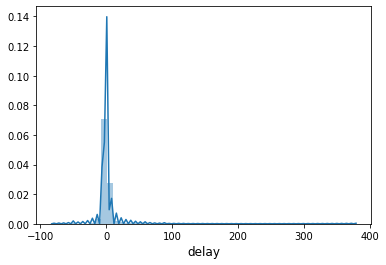

In [43]:
# target variable
# right skewed distribution
# outliers present but not that significant , hence  

sns.distplot(y_train)
plt.xlabel('delay', fontsize=12)

Text(0.5, 0, 'delay')

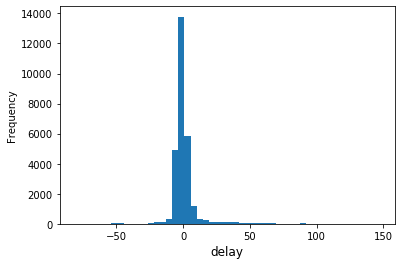

In [44]:
(y_train.loc[y_train<150 ]).plot.hist(bins=50)
plt.xlabel('delay', fontsize=12)

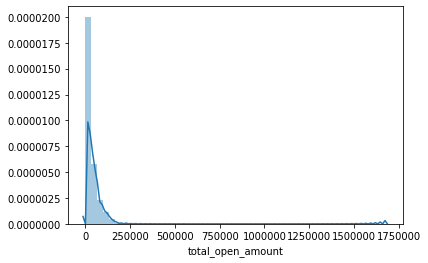

In [45]:
## total_open_amount
## it have certain outliers
## rightly skewed

sns.distplot(x_train['total_open_amount'])

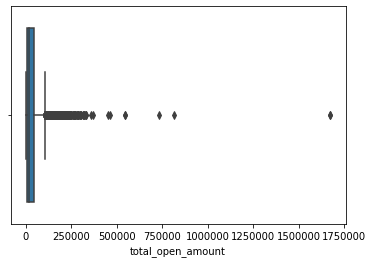

In [46]:
sns.boxplot(x = x_train['total_open_amount'])

In [47]:
##removing the outliers

y = x_train['total_open_amount']
outliers = y.between(y.quantile(.06), y.quantile(.95))
outliers=outliers.rename_axis('id').reset_index(name='outliers')
outliers=outliers[outliers['outliers']==False]
fg=list(outliers['id'])
len(fg)
x_train=x_train.drop(fg)

y_train = y_train.drop(fg)

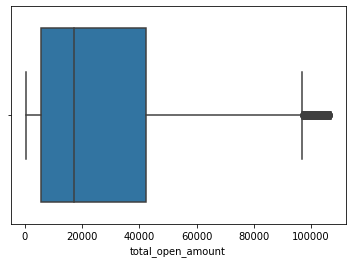

In [48]:
sns.boxplot(x = x_train['total_open_amount'])


### Multivariate Analysis

In [49]:
x_train.merge(y_train,on = x_train.index)

,key_0,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen,delay
0,27022,U001,0200769623,2019-01-11,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,10357.32,2018-12-30,0,-3
1,31937,U001,0200786288,2019-01-11,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,9388.77,2018-12-30,0,-3
2,26143,U001,0200769623,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,1260.47,2018-12-30,0,-5
3,9193,U001,0200769623,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,USD,11582.37,2018-12-30,0,-5
4,47180,U001,0200769623,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,6887.85,2018-12-30,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24915,3246,U001,0200769623,2019-10-17,2019.0,1.929976e+09,2019-10-06,2019-10-06,2019-10-21,USD,60756.13,2019-10-06,0,-4
24916,47010,U001,0200455322,2019-11-14,2019.0,1.929963e+09,2019-10-06,2019-10-04,2019-11-05,USD,52278.75,2019-10-06,0,9
24917,1556,U001,0200769623,2019-10-16,2019.0,1.929974e+09,2019-10-06,2019-10-05,2019-10-21,USD,36088.98,2019-10-06,0,-5
24918,15180,U001,0200769623,2019-10-17,2019.0,1.929964e+09,2019-10-06,2019-10-04,2019-10-21,USD,15138.80,2019-10-06,0,-4


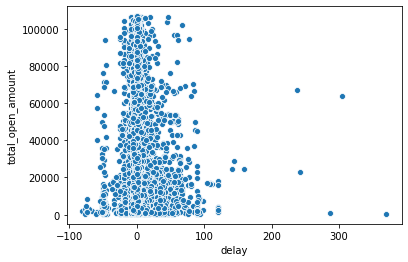

In [50]:
# no direct contact with the train set
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="total_open_amount")

## Feature Engineering

In [51]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24920 entries, 27022 to 13175
Data columns (total 12 columns):
business_code           24920 non-null object
cust_number             24920 non-null object
clear_date              24920 non-null datetime64[ns]
buisness_year           24920 non-null float64
doc_id                  24920 non-null float64
posting_date            24920 non-null datetime64[ns]
document_create_date    24920 non-null datetime64[ns]
due_in_date             24920 non-null datetime64[ns]
invoice_currency        24920 non-null object
total_open_amount       24920 non-null float64
baseline_create_date    24920 non-null datetime64[ns]
isOpen                  24920 non-null int64
dtypes: datetime64[ns](5), float64(3), int64(1), object(3)
memory usage: 2.5+ MB


In [52]:
 x_train.nunique()

business_code               6
cust_number              1216
clear_date                285
buisness_year               1
doc_id                  24330
posting_date              281
document_create_date      287
due_in_date               343
invoice_currency            2
total_open_amount       22402
baseline_create_date      290
isOpen                      1
dtype: int64

In [53]:
x_train.drop(['clear_date', 'isOpen', 'baseline_create_date','invoice_currency','buisness_year'],axis = 1, inplace = True)
x_val.drop(['clear_date', 'isOpen', 'baseline_create_date','invoice_currency','buisness_year'],axis = 1, inplace = True)
x_test.drop(['clear_date', 'isOpen', 'baseline_create_date','invoice_currency','buisness_year'],axis = 1, inplace = True)

x_train.shape , x_val.shape , x_test.shape

((24920, 7), (6000, 7), (6000, 7))

## Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

## for business_code
business_code_encoder = LabelEncoder()
business_code_encoder.fit(x_train['business_code'])
x_train['business_code_enc'] = business_code_encoder.transform(x_train['business_code'])
x_val['business_code_enc'] = business_code_encoder.transform(x_val['business_code'])
x_test['business_code_enc'] = business_code_encoder.transform(x_test['business_code'])

x_train[['business_code_enc','business_code']]

,business_code_enc,business_code
27022,1,U001
31937,1,U001
26143,1,U001
9193,1,U001
47180,1,U001
...,...,...
3246,1,U001
47010,1,U001
1556,1,U001
15180,1,U001


In [55]:
# function will delete a column from the 3 sets
def drop_column(col ,train_func = x_train,val_func = x_val,test_func = x_test):
    train_func.drop(col, axis =1,inplace=True)
    val_func.drop(col,axis=1 , inplace=True)
    test_func.drop(col,axis=1 , inplace=True)

    return train_func,val_func ,test_func

In [56]:
# function to do a status check  on all the dfs 
def status(train_func = x_train,val_func = x_val,test_func = x_test):
    print(train_func.info())
    print("****************************")
    print(train_func.shape,val_func.shape,test_func.shape)
    print("************Train Dataframe****************")
    print(train_func.isna().sum())
    print("************Test Dataframe****************")
    print(test_func.isna().sum())    
    print("************Val Dataframe****************")
    print(val_func.isna().sum())

In [57]:
## dropping business_code col

x_train ,x_val, x_test = drop_column(['business_code'])

In [58]:
status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24920 entries, 27022 to 13175
Data columns (total 7 columns):
cust_number             24920 non-null object
doc_id                  24920 non-null float64
posting_date            24920 non-null datetime64[ns]
document_create_date    24920 non-null datetime64[ns]
due_in_date             24920 non-null datetime64[ns]
total_open_amount       24920 non-null float64
business_code_enc       24920 non-null int32
dtypes: datetime64[ns](3), float64(2), int32(1), object(1)
memory usage: 1.4+ MB
None
****************************
(24920, 7) (6000, 7) (6000, 7)
************Train Dataframe****************
cust_number             0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
total_open_amount       0
business_code_enc       0
dtype: int64
************Test Dataframe****************
cust_number             0
doc_id                  0
posting_date            0
document_create_date    0
due_in_da

In [59]:
## for customer_number

cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(x_train['cust_number'])
x_train['cust_number_enc'] = cust_number_encoder.transform(x_train['cust_number'])

x_train[['cust_number_enc','cust_number']]

,cust_number_enc,cust_number
27022,723,0200769623
31937,765,0200786288
26143,723,0200769623
9193,723,0200769623
47180,723,0200769623
...,...,...
3246,723,0200769623
47010,493,0200455322
1556,723,0200769623
15180,723,0200769623


In [60]:
#Since x_val new catagories of cust_number are seen hence we have to explicitly add them to class

# finding what are the new catagories in the validation set
diff = set(x_val['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [61]:
x_val['cust_number_enc'] = cust_number_encoder.transform(x_val['cust_number'])

In [62]:
# for test

diff2 = set(x_test['cust_number'])-set(cust_number_encoder.classes_)
for items in diff2:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [63]:
x_test['cust_number_enc'] = cust_number_encoder.transform(x_test['cust_number'])

In [64]:
## dropping cust_number col

x_train ,x_val, x_test = drop_column(['cust_number'])

In [65]:
status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24920 entries, 27022 to 13175
Data columns (total 7 columns):
doc_id                  24920 non-null float64
posting_date            24920 non-null datetime64[ns]
document_create_date    24920 non-null datetime64[ns]
due_in_date             24920 non-null datetime64[ns]
total_open_amount       24920 non-null float64
business_code_enc       24920 non-null int32
cust_number_enc         24920 non-null int32
dtypes: datetime64[ns](3), float64(2), int32(2)
memory usage: 1.3 MB
None
****************************
(24920, 7) (6000, 7) (6000, 7)
************Train Dataframe****************
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
total_open_amount       0
business_code_enc       0
cust_number_enc         0
dtype: int64
************Test Dataframe****************
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
total_open_amount     

In [66]:
## for doc_id

doc_id_encoder = LabelEncoder()
doc_id_encoder.fit(x_train['doc_id'])
x_train['doc_id_enc'] = doc_id_encoder.transform(x_train['doc_id'])

x_train[['doc_id_enc','doc_id']]

,doc_id_enc,doc_id
27022,80,1.928542e+09
31937,40,1.928538e+09
26143,84,1.928543e+09
9193,44,1.928539e+09
47180,67,1.928541e+09
...,...,...
3246,22028,1.929976e+09
47010,21951,1.929963e+09
1556,22022,1.929974e+09
15180,21962,1.929964e+09


In [67]:
diff3 = set(x_val['doc_id'])-set(doc_id_encoder.classes_)
for items in diff3:
    doc_id_encoder.classes_ = np.append(doc_id_encoder.classes_,items)
    


In [68]:
x_val['doc_id_enc'] = doc_id_encoder.transform(x_val['doc_id'])

In [69]:
diff4 = set(x_test['doc_id'])-set(doc_id_encoder.classes_)
for items in diff4:
    doc_id_encoder.classes_ = np.append(doc_id_encoder.classes_,items)

In [70]:
x_test['doc_id_enc'] = doc_id_encoder.transform(x_test['doc_id'])

In [71]:
## dropping drop_id col

x_train ,x_val, x_test = drop_column(['doc_id'])

In [72]:
status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24920 entries, 27022 to 13175
Data columns (total 7 columns):
posting_date            24920 non-null datetime64[ns]
document_create_date    24920 non-null datetime64[ns]
due_in_date             24920 non-null datetime64[ns]
total_open_amount       24920 non-null float64
business_code_enc       24920 non-null int32
cust_number_enc         24920 non-null int32
doc_id_enc              24920 non-null int64
dtypes: datetime64[ns](3), float64(1), int32(2), int64(1)
memory usage: 1.3 MB
None
****************************
(24920, 7) (6000, 7) (6000, 7)
************Train Dataframe****************
posting_date            0
document_create_date    0
due_in_date             0
total_open_amount       0
business_code_enc       0
cust_number_enc         0
doc_id_enc              0
dtype: int64
************Test Dataframe****************
posting_date            0
document_create_date    0
due_in_date             0
total_open_amount       0
business_code_

## Label Encoding the dates

### for posting_date

In [73]:
# posting_dATE
main_train.posting_date.head()

27022   2018-12-30
31937   2018-12-30
47054   2018-12-30
26143   2018-12-30
6124    2018-12-30
Name: posting_date, dtype: datetime64[ns]

In [74]:
main_train.posting_date.tail()

8825    2020-02-27
4766    2020-02-27
19258   2020-02-27
11554   2020-02-27
34988   2020-02-27
Name: posting_date, dtype: datetime64[ns]

In [75]:
## extracting the day month and year

x_train['day_posting_date'] = x_train['posting_date'].dt.day
x_train['month_posting_date'] = x_train['posting_date'].dt.month
x_train['year_posting_date'] = x_train['posting_date'].dt.year

x_val['day_posting_date'] = x_val['posting_date'].dt.day
x_val['month_posting_date'] = x_val['posting_date'].dt.month
x_val['year_posting_date'] = x_val['posting_date'].dt.year


x_test['day_posting_date'] = x_test['posting_date'].dt.day
x_test['month_posting_date'] = x_test['posting_date'].dt.month
x_test['year_posting_date'] = x_test['posting_date'].dt.year

x_train[['day_posting_date' , 'posting_date']]

,day_posting_date,posting_date
27022,30,2018-12-30
31937,30,2018-12-30
26143,30,2018-12-30
9193,30,2018-12-30
47180,30,2018-12-30
...,...,...
3246,6,2019-10-06
47010,6,2019-10-06
1556,6,2019-10-06
15180,6,2019-10-06


In [76]:
## dropping posting_date col

x_train ,x_val, x_test = drop_column(['posting_date'])

In [77]:
status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24920 entries, 27022 to 13175
Data columns (total 9 columns):
document_create_date    24920 non-null datetime64[ns]
due_in_date             24920 non-null datetime64[ns]
total_open_amount       24920 non-null float64
business_code_enc       24920 non-null int32
cust_number_enc         24920 non-null int32
doc_id_enc              24920 non-null int64
day_posting_date        24920 non-null int64
month_posting_date      24920 non-null int64
year_posting_date       24920 non-null int64
dtypes: datetime64[ns](2), float64(1), int32(2), int64(4)
memory usage: 1.7 MB
None
****************************
(24920, 9) (6000, 9) (6000, 9)
************Train Dataframe****************
document_create_date    0
due_in_date             0
total_open_amount       0
business_code_enc       0
cust_number_enc         0
doc_id_enc              0
day_posting_date        0
month_posting_date      0
year_posting_date       0
dtype: int64
************Test Dataframe**

### for document_create_date

In [78]:
x_train['day_document_create_date'] = x_train['document_create_date'].dt.day
x_train['month_document_create_date'] = x_train['document_create_date'].dt.month
x_train['year_document_create_date'] = x_train['document_create_date'].dt.year

x_val['day_document_create_date'] = x_val['document_create_date'].dt.day
x_val['month_document_create_date'] = x_val['document_create_date'].dt.month
x_val['year_document_create_date'] = x_val['document_create_date'].dt.year


x_test['day_document_create_date'] = x_test['document_create_date'].dt.day
x_test['month_document_create_date'] = x_test['document_create_date'].dt.month
x_test['year_document_create_date'] = x_test['document_create_date'].dt.year

x_train[['day_document_create_date' , 'document_create_date']]

,day_document_create_date,document_create_date
27022,30,2018-12-30
31937,29,2018-12-29
26143,30,2018-12-30
9193,29,2018-12-29
47180,29,2018-12-29
...,...,...
3246,6,2019-10-06
47010,4,2019-10-04
1556,5,2019-10-05
15180,4,2019-10-04


In [79]:
## dropping document_create_date col

x_train ,x_val, x_test = drop_column(['document_create_date'])

In [80]:
status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24920 entries, 27022 to 13175
Data columns (total 11 columns):
due_in_date                   24920 non-null datetime64[ns]
total_open_amount             24920 non-null float64
business_code_enc             24920 non-null int32
cust_number_enc               24920 non-null int32
doc_id_enc                    24920 non-null int64
day_posting_date              24920 non-null int64
month_posting_date            24920 non-null int64
year_posting_date             24920 non-null int64
day_document_create_date      24920 non-null int64
month_document_create_date    24920 non-null int64
year_document_create_date     24920 non-null int64
dtypes: datetime64[ns](1), float64(1), int32(2), int64(7)
memory usage: 2.1 MB
None
****************************
(24920, 11) (6000, 11) (6000, 11)
************Train Dataframe****************
due_in_date                   0
total_open_amount             0
business_code_enc             0
cust_number_enc             

### for due_in_date

In [81]:
x_train['day_due_in_date'] = x_train['due_in_date'].dt.day
x_train['month_due_in_date'] = x_train['due_in_date'].dt.month
x_train['year_due_in_date'] = x_train['due_in_date'].dt.year

x_val['day_due_in_date'] = x_val['due_in_date'].dt.day
x_val['month_due_in_date'] = x_val['due_in_date'].dt.month
x_val['year_due_in_date'] = x_val['due_in_date'].dt.year


x_test['day_due_in_date'] = x_test['due_in_date'].dt.day
x_test['month_due_in_date'] = x_test['due_in_date'].dt.month
x_test['year_due_in_date'] = x_test['due_in_date'].dt.year

x_train[['day_due_in_date' , 'due_in_date']]

,day_due_in_date,due_in_date
27022,14,2019-01-14
31937,14,2019-01-14
26143,14,2019-01-14
9193,14,2019-01-14
47180,14,2019-01-14
...,...,...
3246,21,2019-10-21
47010,5,2019-11-05
1556,21,2019-10-21
15180,21,2019-10-21


In [82]:
## dropping due_in_date col

x_train ,x_val, x_test = drop_column(['due_in_date'])

In [83]:
status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24920 entries, 27022 to 13175
Data columns (total 13 columns):
total_open_amount             24920 non-null float64
business_code_enc             24920 non-null int32
cust_number_enc               24920 non-null int32
doc_id_enc                    24920 non-null int64
day_posting_date              24920 non-null int64
month_posting_date            24920 non-null int64
year_posting_date             24920 non-null int64
day_document_create_date      24920 non-null int64
month_document_create_date    24920 non-null int64
year_document_create_date     24920 non-null int64
day_due_in_date               24920 non-null int64
month_due_in_date             24920 non-null int64
year_due_in_date              24920 non-null int64
dtypes: float64(1), int32(2), int64(10)
memory usage: 2.5 MB
None
****************************
(24920, 13) (6000, 13) (6000, 13)
************Train Dataframe****************
total_open_amount             0
business_code_enc

# Feature Selection - Milestone 3

## Filter method

In [84]:
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(x_train)
#the number of non-constant features.
len(x_train.columns[constant_filter.get_support()])

13

In [85]:
## 1.checking for const columns

constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


### There are no constant columns present shown above

In [86]:
## 2.checking for duplicated features

# transpose the feature matrice
x_train_T = x_train.T
# print the number of duplicated features
print(x_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


In [87]:

duplicated_columns

array([], dtype=object)

### There is no duplicated column present

## Correlation Coefficient

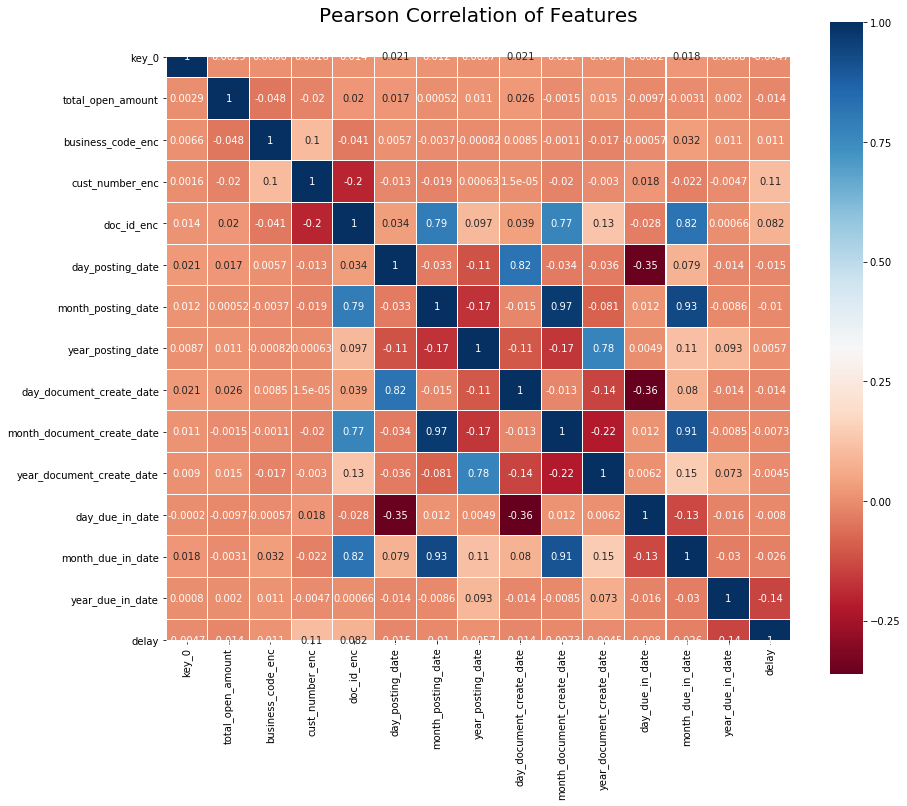

In [88]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [89]:
# also since all the columns have been converted to int/float , we can use variance threshold 

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.85)
sel.fit(x_train)

VarianceThreshold(threshold=0.85)

In [90]:
sel.variances_

array([6.66350613e+08, 3.31973719e-01, 5.79219222e+04, 4.93772636e+07,
       7.82496694e+01, 6.97385908e+00, 4.51394865e-03, 7.81484900e+01,
       7.03432299e+00, 7.32910965e-03, 7.50646592e+01, 7.10911166e+00,
       1.60487879e-04])

In [91]:
 #as we can see there is a very low covariance by analyzing the heatmap and by variance threshold of year_due_in_date,we can drop it

x_train ,x_val, x_test = drop_column(['year_due_in_date'])

In [92]:
status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24920 entries, 27022 to 13175
Data columns (total 12 columns):
total_open_amount             24920 non-null float64
business_code_enc             24920 non-null int32
cust_number_enc               24920 non-null int32
doc_id_enc                    24920 non-null int64
day_posting_date              24920 non-null int64
month_posting_date            24920 non-null int64
year_posting_date             24920 non-null int64
day_document_create_date      24920 non-null int64
month_document_create_date    24920 non-null int64
year_document_create_date     24920 non-null int64
day_due_in_date               24920 non-null int64
month_due_in_date             24920 non-null int64
dtypes: float64(1), int32(2), int64(9)
memory usage: 2.9 MB
None
****************************
(24920, 12) (6000, 12) (6000, 12)
************Train Dataframe****************
total_open_amount             0
business_code_enc             0
cust_number_enc               0
doc_i

## EMBEDDED METHOD

In [93]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # created the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fitted the model to start training.
    model.fit(x_train, y_train)

    # got the importance of the resulting features.
    importances = model.feature_importances_

    # created a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sorted in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(12).plot(kind='barh')  
    return final_df

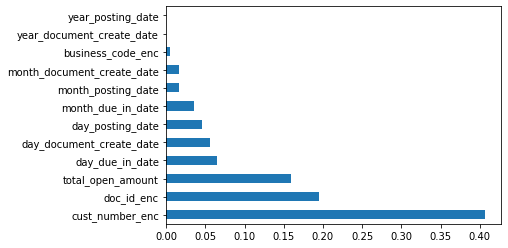

In [94]:
feature_importance=tree_based_feature_importance(x_train,y_train)

In [95]:
display(feature_importance)

,Features,Importances
2,cust_number_enc,0.406568
3,doc_id_enc,0.194521
0,total_open_amount,0.158794
10,day_due_in_date,0.065549
7,day_document_create_date,0.056078
4,day_posting_date,0.046180
11,month_due_in_date,0.035351
5,month_posting_date,0.016203
8,month_document_create_date,0.015917
1,business_code_enc,0.004563


In [96]:
# as we can see the last 7 columns have negligible importance so, we drop those

In [97]:
## dropping  col

x_train ,x_val, x_test = drop_column(['year_posting_date', 'year_document_create_date', 'business_code_enc', 'month_document_create_date','month_posting_date','month_due_in_date','day_posting_date'])

In [98]:
status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24920 entries, 27022 to 13175
Data columns (total 5 columns):
total_open_amount           24920 non-null float64
cust_number_enc             24920 non-null int32
doc_id_enc                  24920 non-null int64
day_document_create_date    24920 non-null int64
day_due_in_date             24920 non-null int64
dtypes: float64(1), int32(1), int64(3)
memory usage: 1.7 MB
None
****************************
(24920, 5) (6000, 5) (6000, 5)
************Train Dataframe****************
total_open_amount           0
cust_number_enc             0
doc_id_enc                  0
day_document_create_date    0
day_due_in_date             0
dtype: int64
************Test Dataframe****************
total_open_amount           0
cust_number_enc             0
doc_id_enc                  0
day_document_create_date    0
day_due_in_date             0
dtype: int64
************Val Dataframe****************
total_open_amount           0
cust_number_enc             0
d

# Modelling

## Since ours is a regression problem , hence we'll apply regression modelling techniques

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [100]:
# lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

## Linear Regression

In [101]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
cll = LinearRegression()
cll.fit(x_train, y_train)

# Predicting the x_val Set Results
predicted = cll.predict(x_val)

In [102]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

## Decision Tree Regressor

In [103]:

Algorithm.append('Decision Tree Regressor')
cld = DecisionTreeRegressor()
cld.fit(x_train, y_train)


predicted = cld.predict(x_val)

In [104]:

MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

## Random Forest Regressor

In [105]:

Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train, y_train)


predicted = clf.predict(x_val)

In [106]:

MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [107]:

Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [108]:
# Score_Card
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,54.082908,-0.100890
1,Decision Tree Regressor,3763.941333,-75.617285
2,Random Forest Regressor,1771.103100,-35.051866


## now we check on the test test whether it is getting overfitted or not

In [109]:
# for linear regressor
y_predict_test = cll.predict(x_test)
mean_squared_error(y_test, y_predict_test)

120.04862695021086

In [110]:
 # for decision tree regressor
y_predict_test = cld.predict(x_test)
mean_squared_error(y_test, y_predict_test)

22295.276833333333

In [111]:
# for random forest regressor
y_predict_test = clf.predict(x_test)
mean_squared_error(y_test, y_predict_test)

5569.406605

## as we can see there is no such difference, we're good to go!

# The main_test data

In [112]:
main_test

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen
14837,CA02,0140106181,NaT,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,CAD,9433.84,2020-02-28,1
29626,U001,0200705089,NaT,2020.0,1.930575e+09,2020-02-27,2020-02-26,2020-03-13,USD,5950.00,2020-02-27,1
7274,U001,0200785971,NaT,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,26470.02,2020-02-27,1
24070,U001,0200769623,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,21391.68,2020-02-27,1
35368,U001,0200705742,NaT,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-03-18,USD,26215.14,2020-02-27,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7250,U001,100030964,NaT,2020.0,1.930903e+09,2020-05-15,2020-05-14,2020-05-30,USD,15902.25,2020-05-15,1
4859,U001,0200763229,NaT,2020.0,1.930902e+09,2020-05-15,2020-05-15,2020-05-30,USD,12412.76,2020-05-15,1
17846,U001,100030964,NaT,2020.0,1.930908e+09,2020-05-15,2020-05-15,2020-05-30,USD,6692.21,2020-05-15,1
45649,CA02,0100027744,NaT,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,1


### Now we have to make the main_test in the same format as of x_train

### Pre processing

In [113]:
## null imputation


main_test.isnull().sum()

business_code               0
cust_number                 0
clear_date              10000
buisness_year               0
doc_id                      0
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
isOpen                      0
dtype: int64

In [114]:
## Now we have to drop the cleardate column, as we have to predict that


x_main_test = main_test.drop(['clear_date'],axis=1)
x_main_test

main_test.drop(['clear_date'], inplace =True,axis=1)

In [115]:
x_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14837 to 17026
Data columns (total 11 columns):
business_code           10000 non-null object
cust_number             10000 non-null object
buisness_year           10000 non-null float64
doc_id                  10000 non-null float64
posting_date            10000 non-null datetime64[ns]
document_create_date    10000 non-null datetime64[ns]
due_in_date             10000 non-null datetime64[ns]
invoice_currency        10000 non-null object
total_open_amount       10000 non-null float64
baseline_create_date    10000 non-null datetime64[ns]
isOpen                  10000 non-null int64
dtypes: datetime64[ns](4), float64(3), int64(1), object(3)
memory usage: 937.5+ KB


In [116]:
# dropping the uneccessary columns also

x_main_test.drop(['business_code', 'buisness_year', 'posting_date', 'invoice_currency', 'baseline_create_date', 'isOpen'], inplace =True,axis=1)

In [117]:
x_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14837 to 17026
Data columns (total 5 columns):
cust_number             10000 non-null object
doc_id                  10000 non-null float64
document_create_date    10000 non-null datetime64[ns]
due_in_date             10000 non-null datetime64[ns]
total_open_amount       10000 non-null float64
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 468.8+ KB


In [118]:
## Feature Engineering

In [119]:
# Label encoding the dates

x_main_test['day_document_create_date'] = x_main_test['document_create_date'].dt.day
x_main_test['month_document_create_date'] = x_main_test['document_create_date'].dt.month
x_main_test['year_document_create_date'] = x_main_test['document_create_date'].dt.year


x_main_test[['day_document_create_date' , 'document_create_date']]

,day_document_create_date,document_create_date
14837,27,2020-02-27
29626,26,2020-02-26
7274,27,2020-02-27
24070,27,2020-02-27
35368,28,2020-02-28
...,...,...
7250,14,2020-05-14
4859,15,2020-05-15
17846,15,2020-05-15
45649,19,2020-05-19


In [120]:
x_main_test['day_due_in_date'] = x_main_test['due_in_date'].dt.day
x_main_test['month_due_in_date'] =x_main_test['due_in_date'].dt.month
x_main_test['year_due_in_date'] = x_main_test['due_in_date'].dt.year

x_main_test[['day_due_in_date' , 'due_in_date']]

,day_due_in_date,due_in_date
14837,9,2020-03-09
29626,13,2020-03-13
7274,13,2020-03-13
24070,13,2020-03-13
35368,18,2020-03-18
...,...,...
7250,30,2020-05-30
4859,30,2020-05-30
17846,30,2020-05-30
45649,19,2020-05-19


In [121]:
x_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14837 to 17026
Data columns (total 11 columns):
cust_number                   10000 non-null object
doc_id                        10000 non-null float64
document_create_date          10000 non-null datetime64[ns]
due_in_date                   10000 non-null datetime64[ns]
total_open_amount             10000 non-null float64
day_document_create_date      10000 non-null int64
month_document_create_date    10000 non-null int64
year_document_create_date     10000 non-null int64
day_due_in_date               10000 non-null int64
month_due_in_date             10000 non-null int64
year_due_in_date              10000 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(6), object(1)
memory usage: 937.5+ KB


In [122]:
# label encoding the customer_number

temp = set(x_main_test['cust_number'])-set(cust_number_encoder.classes_)
for items in temp:
    cust_number_encoder.classes_= np.append(cust_number_encoder.classes_,items)

x_main_test['cust_number_enc'] = cust_number_encoder.transform(x_main_test['cust_number'])

x_main_test[['cust_number_enc' , 'cust_number']]

,cust_number_enc,cust_number
14837,326,0140106181
29626,589,0200705089
7274,764,0200785971
24070,723,0200769623
35368,591,0200705742
...,...,...
7250,897,100030964
4859,710,0200763229
17846,897,100030964
45649,73,0100027744


In [123]:
# label encoding the doc_id

temp1 = set(x_main_test['doc_id'])-set(doc_id_encoder.classes_)
for items in temp1:
    doc_id_encoder.classes_= np.append(doc_id_encoder.classes_,items)

x_main_test['doc_id_enc'] = doc_id_encoder.transform(x_main_test['doc_id'])

x_main_test[['doc_id_enc' , 'doc_id']]

,doc_id_enc,doc_id
14837,45834,2.960617e+09
29626,22034,1.930575e+09
7274,22034,1.930572e+09
24070,36107,1.930577e+09
35368,36107,1.930581e+09
...,...,...
7250,22034,1.930903e+09
4859,22034,1.930902e+09
17846,44347,1.930908e+09
45649,45834,2.960636e+09


In [124]:
x_main_test.drop(['cust_number', 'document_create_date', 'due_in_date','doc_id'], inplace =True,axis=1)

In [125]:
x_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14837 to 17026
Data columns (total 9 columns):
total_open_amount             10000 non-null float64
day_document_create_date      10000 non-null int64
month_document_create_date    10000 non-null int64
year_document_create_date     10000 non-null int64
day_due_in_date               10000 non-null int64
month_due_in_date             10000 non-null int64
year_due_in_date              10000 non-null int64
cust_number_enc               10000 non-null int32
doc_id_enc                    10000 non-null int64
dtypes: float64(1), int32(1), int64(7)
memory usage: 742.2 KB


In [126]:
# dropping the columns so that train data and test data columns should match

x_main_test.drop(['year_document_create_date', 'month_document_create_date', 'month_due_in_date', 'year_due_in_date'], inplace =True,axis=1)

In [127]:
x_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14837 to 17026
Data columns (total 5 columns):
total_open_amount           10000 non-null float64
day_document_create_date    10000 non-null int64
day_due_in_date             10000 non-null int64
cust_number_enc             10000 non-null int32
doc_id_enc                  10000 non-null int64
dtypes: float64(1), int32(1), int64(3)
memory usage: 429.7 KB


# Final Prediction

In [128]:
final_result = clf.predict(x_main_test)

In [129]:
final_result = pd.Series(final_result,name='Predicted_Delay')

In [130]:
main_test.reset_index(drop=True,inplace=True)

In [131]:
result = main_test.merge(final_result , on = x_main_test.index )
result

,key_0,business_code,cust_number,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen,Predicted_Delay
0,14837,CA02,0140106181,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,CAD,9433.84,2020-02-28,1,8.6
1,29626,U001,0200705089,2020.0,1.930575e+09,2020-02-27,2020-02-26,2020-03-13,USD,5950.00,2020-02-27,1,17.5
2,7274,U001,0200785971,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,26470.02,2020-02-27,1,0.5
3,24070,U001,0200769623,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,21391.68,2020-02-27,1,3.2
4,35368,U001,0200705742,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-03-18,USD,26215.14,2020-02-27,1,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7250,U001,100030964,2020.0,1.930903e+09,2020-05-15,2020-05-14,2020-05-30,USD,15902.25,2020-05-15,1,8.5
9996,4859,U001,0200763229,2020.0,1.930902e+09,2020-05-15,2020-05-15,2020-05-30,USD,12412.76,2020-05-15,1,11.0
9997,17846,U001,100030964,2020.0,1.930908e+09,2020-05-15,2020-05-15,2020-05-30,USD,6692.21,2020-05-15,1,19.2
9998,45649,CA02,0100027744,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,1,15.1


In [132]:
result.Predicted_Delay = result.Predicted_Delay.apply(np.ceil).astype(int)
result

,key_0,business_code,cust_number,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen,Predicted_Delay
0,14837,CA02,0140106181,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,CAD,9433.84,2020-02-28,1,9
1,29626,U001,0200705089,2020.0,1.930575e+09,2020-02-27,2020-02-26,2020-03-13,USD,5950.00,2020-02-27,1,18
2,7274,U001,0200785971,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,26470.02,2020-02-27,1,1
3,24070,U001,0200769623,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,21391.68,2020-02-27,1,4
4,35368,U001,0200705742,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-03-18,USD,26215.14,2020-02-27,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7250,U001,100030964,2020.0,1.930903e+09,2020-05-15,2020-05-14,2020-05-30,USD,15902.25,2020-05-15,1,9
9996,4859,U001,0200763229,2020.0,1.930902e+09,2020-05-15,2020-05-15,2020-05-30,USD,12412.76,2020-05-15,1,11
9997,17846,U001,100030964,2020.0,1.930908e+09,2020-05-15,2020-05-15,2020-05-30,USD,6692.21,2020-05-15,1,20
9998,45649,CA02,0100027744,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,1,16


In [133]:
result['predicted_payment_date'] = pd.to_datetime(result.due_in_date) + pd.to_timedelta(result.Predicted_Delay, unit="D")
result

,key_0,business_code,cust_number,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen,Predicted_Delay,predicted_payment_date
0,14837,CA02,0140106181,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,CAD,9433.84,2020-02-28,1,9,2020-03-18
1,29626,U001,0200705089,2020.0,1.930575e+09,2020-02-27,2020-02-26,2020-03-13,USD,5950.00,2020-02-27,1,18,2020-03-31
2,7274,U001,0200785971,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,26470.02,2020-02-27,1,1,2020-03-14
3,24070,U001,0200769623,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,21391.68,2020-02-27,1,4,2020-03-17
4,35368,U001,0200705742,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-03-18,USD,26215.14,2020-02-27,1,3,2020-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7250,U001,100030964,2020.0,1.930903e+09,2020-05-15,2020-05-14,2020-05-30,USD,15902.25,2020-05-15,1,9,2020-06-08
9996,4859,U001,0200763229,2020.0,1.930902e+09,2020-05-15,2020-05-15,2020-05-30,USD,12412.76,2020-05-15,1,11,2020-06-10
9997,17846,U001,100030964,2020.0,1.930908e+09,2020-05-15,2020-05-15,2020-05-30,USD,6692.21,2020-05-15,1,20,2020-06-19
9998,45649,CA02,0100027744,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,1,16,2020-06-04


## Creating the aging  bucket

In [134]:
def bucketiz(x):
    if x<0:
        return('(< 0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')

result = result.reset_index(drop=True)

result['Bucket_Days']= pd.Series([bucketiz(x=result['Predicted_Delay'][i])  
                                  for i in range(len(result))])

bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}

result['bucket_id'] = result['Bucket_Days'].map(bucket_mapper)

result.columns

Index(['key_0', 'business_code', 'cust_number', 'buisness_year', 'doc_id',
       'posting_date', 'document_create_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'isOpen', 'Predicted_Delay', 'predicted_payment_date', 'Bucket_Days',
       'bucket_id'],
      dtype='object')

In [135]:
result.head(50)

,key_0,business_code,cust_number,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,isOpen,Predicted_Delay,predicted_payment_date,Bucket_Days,bucket_id
0,14837,CA02,0140106181,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,CAD,9433.84,2020-02-28,1,9,2020-03-18,(0-15) Days,1
1,29626,U001,0200705089,2020.0,1.930575e+09,2020-02-27,2020-02-26,2020-03-13,USD,5950.00,2020-02-27,1,18,2020-03-31,(16-30) Days,2
2,7274,U001,0200785971,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,USD,26470.02,2020-02-27,1,1,2020-03-14,(0-15) Days,1
3,24070,U001,0200769623,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,21391.68,2020-02-27,1,4,2020-03-17,(0-15) Days,1
4,35368,U001,0200705742,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-03-18,USD,26215.14,2020-02-27,1,3,2020-03-21,(0-15) Days,1
5,22043,U001,0200307138,2020.0,1.930569e+09,2020-02-27,2020-02-25,2020-03-28,USD,58926.00,2020-02-27,1,1,2020-03-29,(0-15) Days,1
6,898,U001,0200706844,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,73337.57,2020-02-27,1,1,2020-03-14,(0-15) Days,1
7,41152,U001,0200769623,2020.0,1.930567e+09,2020-02-27,2020-02-25,2020-03-13,USD,51704.33,2020-02-27,1,3,2020-03-16,(0-15) Days,1
8,5464,CA02,0140104423,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-08,CAD,60604.18,2020-02-27,1,1,2020-03-09,(0-15) Days,1
9,33928,CA02,0140106408,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,CAD,66257.10,2020-02-28,1,1,2020-03-10,(0-15) Days,1


In [137]:
result.isnull().sum()

key_0                     0
business_code             0
cust_number               0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
isOpen                    0
Predicted_Delay           0
predicted_payment_date    0
Bucket_Days               0
bucket_id                 0
dtype: int64

In [136]:
result.to_csv('result.csv')

#    ---- THE END ----